In [1]:
import pandas as pd 
import numpy as np
import json
import os
import json
import warnings
warnings.filterwarnings('ignore')
import gzip
import faiss
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

reviews = []

with open(r"C:\Users\Rishabh\Downloads\Amazon_Project_Data\Beauty\All_Beauty.jsonl.gz", "rt", encoding="utf-8") as fp:
    for line in fp:
        data_line = json.loads(line.strip())
        reviews.append(data_line)

In [3]:
## Created review df 

df1 = pd.DataFrame(reviews)

In [4]:
df = df1[['rating','parent_asin','user_id']]

In [5]:
df = df.sample(frac = 0.1)

In [6]:
## Trained Data ##

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
 
# Define the format
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[["user_id", "parent_asin", "rating"]], reader)

# Train-test split
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD model
model = SVD()
model.fit(trainset)

# Predict and evaluate
predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))


RMSE: 1.4618
RMSE: 1.461763964519242


In [7]:
(df['rating']**2).skew()

-0.8364728534681137

<Axes: xlabel='rating', ylabel='Density'>

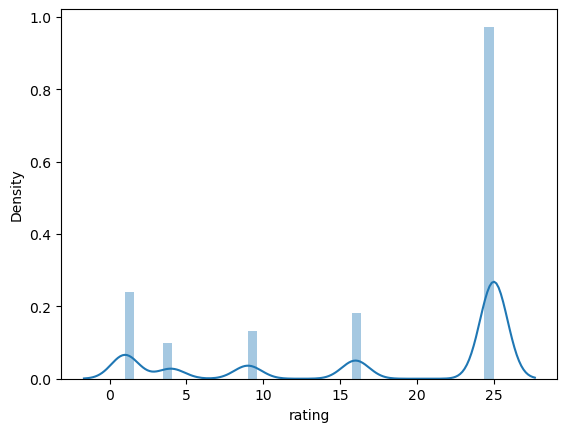

In [9]:
sns.distplot(df['rating']**2)

In [8]:
#from surprise.model_selection import GridSearchCV

In [11]:
#param_grid = { 'n_factors':[20,50,100],
 #             'n_epochs':[10,20,30],
 #               'lr_all':[0.002,0.005,0.01]    }

In [12]:
#gs = GridSearchCV(SVD,param_grid,measures = ['rmse'],cv = 3)
#gs.fit(data)

#print(gs.best_score['rmse'])

#print(gs.best_params['rmse'])

In [13]:
#from surprise import NMF
#nmf = NMF()

In [14]:
#nmf.fit(trainset)


In [15]:
#nmf_preds = nmf.test(testset)

In [16]:
#accuracy.rmse(nmf_preds)

In [7]:
## Extracted User and Item latent matrices ##

user_mat = model.pu
item_mat = model.qi  

In [8]:
user_mat = user_mat.astype('float32')
item_mat = item_mat.astype('float32')

In [9]:
user_mat.shape,item_mat.shape

((55302, 100), (27592, 100))

In [10]:
## Extracted raw userids

user_ids = [trainset.to_raw_uid(i) for i in range(user_mat.shape[0])]
item_ids = [trainset.to_raw_iid(j) for j in range(item_mat.shape[0])]

In [11]:
## Created dataframes with user_id and their latent_features ##

user_df = pd.DataFrame(user_mat,index=user_ids) 
item_df = pd.DataFrame(item_mat,index=item_ids)

In [17]:
item_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
B075QBP9Z6,0.009621,-0.071800,0.168362,0.075923,0.003379,0.141288,0.002095,0.160146,-0.159877,0.107340,...,0.129623,-0.010664,-0.058670,-0.219763,0.153881,0.124511,-0.015190,-0.025329,0.058652,0.008122
B08M57D1G1,-0.058930,0.047709,0.000129,-0.043176,-0.084923,0.170524,-0.049827,0.078563,0.167679,-0.005232,...,-0.014805,-0.114316,0.067667,0.100716,0.073740,0.157813,0.012306,0.087500,0.006656,-0.096286
B07QQ9D61Q,0.048709,-0.036266,-0.002406,-0.039007,0.007589,-0.238048,-0.025624,-0.091140,-0.079034,0.089271,...,0.043751,0.091087,-0.100237,-0.063482,0.073552,0.128066,-0.200911,-0.170173,0.042190,0.069232
B099DNDV4C,0.123264,-0.019206,0.032613,-0.010128,0.036973,-0.063062,0.094019,-0.061248,0.176186,0.164248,...,0.074496,-0.160148,0.053008,-0.117623,0.070563,0.003775,0.094524,0.075216,0.059657,0.014600
B06XRZ6Q4Z,-0.189311,-0.078790,-0.013547,-0.415220,-0.070546,0.029330,-0.064929,0.185388,0.043903,0.052188,...,-0.050020,0.090364,-0.020718,-0.015771,-0.070869,-0.239343,0.038220,0.004580,0.029919,-0.032323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B08CMZYMKK,0.058953,-0.047347,0.004700,-0.001228,-0.146686,-0.125107,-0.029247,0.120445,-0.029277,0.028763,...,0.208961,0.000426,-0.034552,0.087240,0.071878,0.088363,0.032283,0.086203,-0.062897,-0.040543
B00XHL1HGK,-0.073840,0.082313,0.099279,0.081669,0.082217,0.080800,-0.128694,-0.066139,-0.212930,0.093688,...,0.004258,-0.036485,-0.052612,0.121935,0.096090,0.078786,-0.024845,-0.028770,0.070638,-0.201955
B000QU6R9C,0.049082,-0.011619,0.131984,0.066584,0.015628,-0.023881,0.040642,-0.107025,-0.130219,-0.072999,...,-0.206870,0.355344,0.003050,-0.139299,0.220323,-0.001055,-0.092449,-0.104130,0.099496,-0.082533
B086WFXMGG,0.049545,0.111677,0.071970,0.253443,-0.151233,-0.019682,0.223988,0.068566,-0.079326,-0.079682,...,0.076301,-0.129228,-0.058111,0.205526,-0.109160,0.088018,0.021059,0.018300,-0.204441,0.097622


In [12]:
## Test User to check similarity ##
user= user_df.iloc[400] 
user.shape

(100,)

In [15]:
## Reshaped Test user to array

user_array = np.array(user).reshape(1,-1)

In [16]:
## Find Similar Users ##

d = item_mat.shape[1]

index = faiss.IndexFlatIP(d)  
index.add(item_mat)
k  = item_mat.shape[0]

distances,indices = index.search(user_array, k) 

In [17]:
### Extracted user_id indices and their respective distances from 2D arrays ###

top_user_ids  = indices[0]
top_dist  = distances[0]

In [18]:
## Convert distances array of all users to a list

distance = list(top_dist)

In [19]:
## Extract Index of all similar users as user_id ##

similar_user_ids = [user_df.index[i] for i in top_user_ids]

In [ ]:
len(similar_user_ids)

In [20]:
## Created df with users and similarity 

user_dist_df = pd.DataFrame(distance,similar_user_ids,columns=['Distance'])

In [21]:
filtered_df = df[df['user_id'].isin(similar_user_ids)]
filtered_df.shape

(28534, 3)

In [22]:
sim_df = filtered_df.pivot_table(index = 'user_id',columns = 'parent_asin', values = 'rating' ).fillna(0)

In [23]:
distance_df = pd.DataFrame(distances[0],columns=['Distance'])

In [24]:
indice_df = pd.DataFrame(indices[0],columns = ['Index'])

In [25]:
score_ind = pd.concat([distance_df,indice_df],axis = 1)

In [26]:
dist  = np.reshape(score_ind['Distance'],(-1,1))

In [ ]:
dist.shape

In [27]:
sim_df = sim_df.astype('float32')

In [28]:
from scipy.sparse import csr_matrix

In [29]:
new_sim = csr_matrix(sim_df)

In [30]:
new_sim.shape,dist.T.shape

((27605, 17017), (1, 27605))

In [31]:
result = dist.T @ new_sim 

In [32]:
print(result.shape, len(sim_df.columns))

(1, 17017) 17017


In [33]:
sim_df.columns

Index(['069267599X', '0985393300', '0990995119', '130414089X', '4293845755',
       '6041134546', '8674394329', '9533223618', '9788077587', '979077530X',
       ...
       'B0C8HVQKG7', 'B0C8XJQNHH', 'B0C9CWKY9G', 'B0C9HGV5HK', 'B0CB4CYCJM',
       'B0CBWDTY41', 'B0CDH5TH82', 'B0CDNZ7F2V', 'B0CDQ8KM21', 'B0CHGDT817'],
      dtype='object', name='parent_asin', length=17017)

In [34]:
product_score_df = pd.DataFrame( result.reshape(-1, 1),index = sim_df.columns,columns = ['score'])

In [35]:
product_score_df.sort_values(by = 'score',ascending = False)

,score
parent_asin,
B0BM4GX6TT,4.796400
B083BDVS36,4.712611
B00L4HJX7O,3.869931
B01N4885PD,3.279164
B005BZQHEC,3.243124
...,...
B082245PK2,-3.443007
B003ILUQPM,-3.587942
B09Q3X5YWR,-4.505758


In [36]:
import import_ipynb
import Amazon_beauty_product_data

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Rishabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Pinnacle of Wellness Rejuvenating Vitamin C Anti Aging Serum with Hyaluronic Acid – Best Facial Skin Care Product for Women and Men (2oz)
Eyebrow Stamp and Eyebrow Stencil Kit, One Step Eyebrow Stamp and Shaping Kit for Perfect Brow, Eyebrow Brush,Eyebrow soap kit ,Gel Brow Soap Wax, Eyeshadow Stick Shimmer Eyeshadow Pencil ,Eye Makeup
3 pack Alternate Tooth Rat tail Styling combs Parting combs Root Teasing combs hair combs for women （3 Pack ）
Colourpop Super Shock Metallic Eyeshadow (3)
Sierra Bees Organic Lip Balms Creme Brulee 4 Pack 15 oz 4 25 g Each
Liddy Hair 4x4 Free Part Lace Closure Straight Human Hair 8A Brazilian Virgin Hair With Baby Hair 130% Density Natural Color(8''-20''Closure, Straight) (8'')


In [37]:
product_score_df.columns

Index(['score'], dtype='object')

In [39]:
content_scores = Amazon_beauty_product_data.score_index

In [ ]:
content_scores_df = pd.DataFrame(index = content_scores['product_id'], columns = content_scores['Distance'])